In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# pip install matplotlib==3.4.2

In [ ]:
data = pd.read_csv("/content/cardio_train.csv",sep=';')
print(data.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80          1.0   1.0    0.0   
1   1  20228       1     156    85.0    140     90          3.0   1.0    0.0   
2   2  18857       1     165    64.0    130     70          3.0   1.0    0.0   
3   3  17623       2     169    82.0    150    100          1.0   1.0    0.0   
4   4  17474       1     156    56.0    100     60          1.0   1.0    0.0   

   alco  active  cardio  
0   0.0     1.0     0.0  
1   0.0     1.0     1.0  
2   0.0     0.0     1.0  
3   0.0     1.0     1.0  
4   0.0     0.0     0.0  


#Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


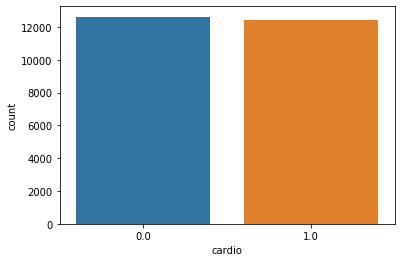

In [ ]:
data['cardio'].value_counts()
sns.countplot(data['cardio'])

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25072 entries, 0 to 25071
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           25072 non-null  int64  
 1   age          25072 non-null  int64  
 2   gender       25072 non-null  int64  
 3   height       25072 non-null  int64  
 4   weight       25072 non-null  float64
 5   ap_hi        25072 non-null  int64  
 6   ap_lo        25072 non-null  int64  
 7   cholesterol  25071 non-null  float64
 8   gluc         25071 non-null  float64
 9   smoke        25071 non-null  float64
 10  alco         25071 non-null  float64
 11  active       25071 non-null  float64
 12  cardio       25071 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.5 MB


In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25071.000000,25071.000000,25071.000000,25071.000000,25071.000000,25071.000000
mean,17892.715260,19457.369775,1.350830,164.399330,74.173455,127.334357,97.624601,1.363169,1.224881,0.091181,0.054764,0.804555,0.496390
std,10352.852917,2473.629583,0.477239,8.205966,14.352088,75.955404,211.248336,0.677531,0.570660,0.287872,0.227524,0.396551,0.499997
min,0.000000,10798.000000,1.000000,55.000000,30.000000,-140.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8921.750000,17641.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,17900.500000,19696.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26849.500000,21316.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,35802.000000,23690.000000,2.000000,250.000000,200.000000,11500.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Check which column has categorical values

In [ ]:
categorial_cols = [col for col in data.columns if data[col].dtype=="object"]
print(categorial_cols)

[]


Check which column has missing values

In [ ]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


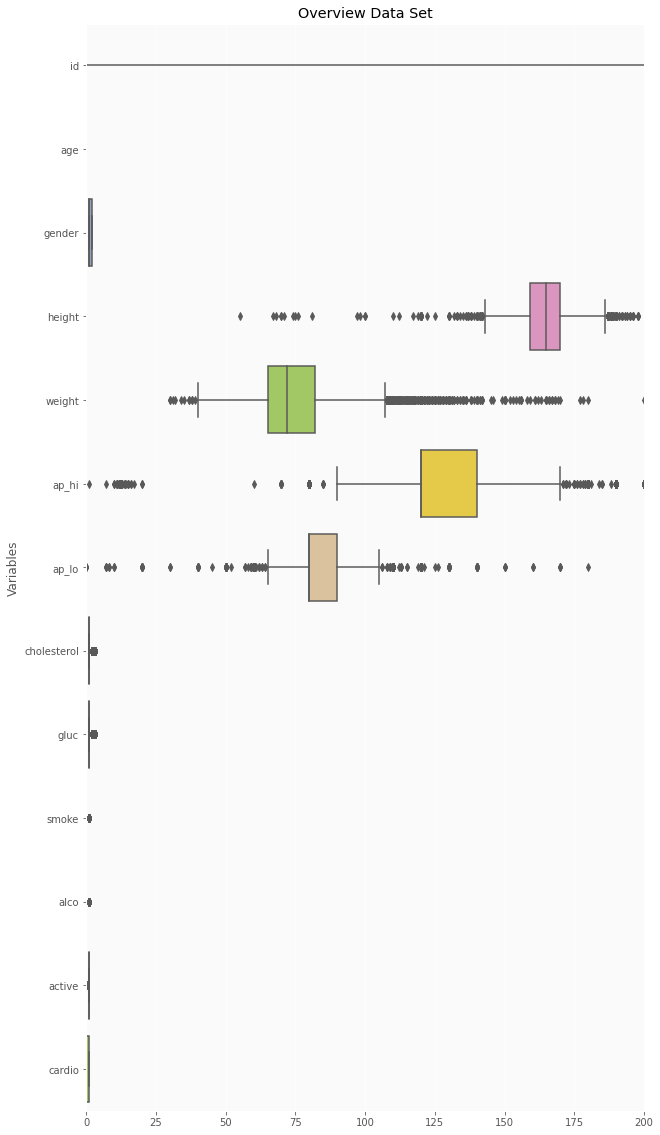

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(10, 20))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25067,35798,19103,1,159,59.0,120,80,1.0,1.0,0.0,0.0,1.0,1.0
25068,35799,16850,2,175,86.0,140,80,2.0,1.0,1.0,0.0,1.0,1.0
25069,35800,19578,1,162,68.0,110,60,3.0,1.0,0.0,0.0,1.0,1.0
25070,35801,14716,2,162,64.0,120,70,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
data=data.dropna()

In [ ]:
data.shape

(25071, 13)

Checking Correlation

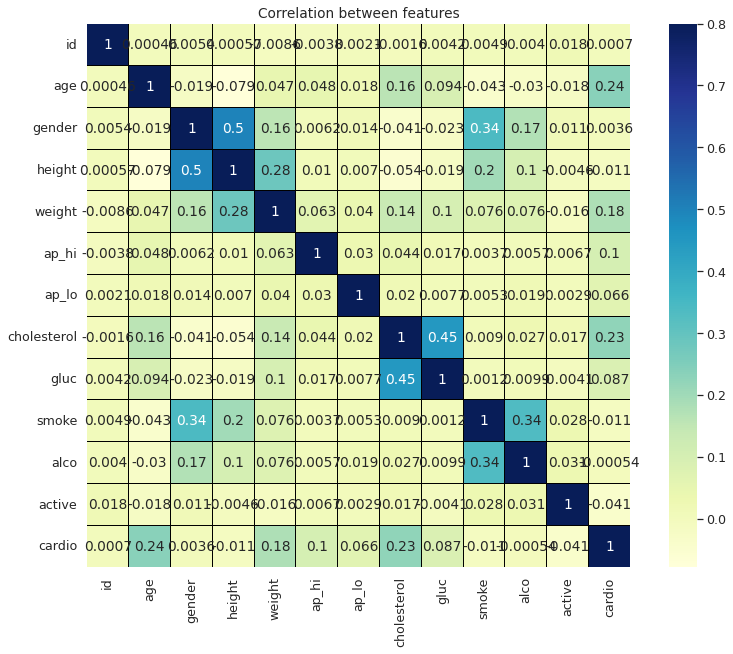

In [ ]:
corr=data.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

In [ ]:
data.drop('id', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Train Test Split

In [ ]:
y = data['cardio']
X = data.drop(columns = 'cardio')

In [ ]:
data['cardio'].value_counts()

0.0    12626
1.0    12445
Name: cardio, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15, random_state = 20)

#Min Max Scaling

In [ ]:
# We need to scale correctly (We will use MinMax Scaler to do this)
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','alco','active']
scaler = MinMaxScaler()
scaler.fit(xtrain[cols_to_scale])
xtrain[cols_to_scale] = scaler.transform(xtrain[cols_to_scale])
xtest[cols_to_scale] = scaler.transform(xtest[cols_to_scale])

In [ ]:
xtrain.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
17365,0.631830,0.0,0.564103,0.200000,0.020232,0.008,1.0,1.0,0.0,0.0,0.0
11148,0.928114,1.0,0.594872,0.200000,0.021093,0.008,1.0,1.0,0.0,0.0,1.0
23013,0.510771,0.0,0.512821,0.380000,0.022815,0.009,0.0,0.0,0.0,0.0,0.0
10744,0.521542,0.0,0.512821,0.293333,0.020232,0.008,0.0,0.0,0.0,0.0,1.0
9783,0.329301,1.0,0.630769,0.346667,0.019372,0.008,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train=xtrain
y_train=ytrain
X_test=xtest
y_test=ytest

# LogisticRegression

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = LogisticRegression(solver='liblinear')
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote, y_train_smote = over.fit_resample(xtrain.astype('float'),ytrain)
    
    model.fit(X_train_smote, y_train_smote)
    modelTestAccuracy=model.score(xtest,ytest)
    modelTrainAccuracy=model.score(X_train_smote, y_train_smote)
    print("logreg Train Accuracy: ",modelTrainAccuracy)
    print("logreg Test Accuracy: ",modelTestAccuracy)

# for k in k_values:
# 	# define pipeline
# 	model = RandomForestClassifier()
# 	over = SMOTE(sampling_strategy=0.8,k_neighbors=k)
	
# 	randomTestAccuracy=random.score(xtest,ytest)
#   randomTrainAccuracy=random.score(X_train_smote, y_train_smote)
#   print(randomTestAccuracy)
#   print(randomTrainAccuracy)
	

For ratio  0.6
k-->  1
logreg Train Accuracy:  0.7577092511013216
logreg Test Accuracy:  0.7565217391304347
k-->  2
logreg Train Accuracy:  0.7562408223201175
logreg Test Accuracy:  0.7565217391304347
k-->  3
logreg Train Accuracy:  0.7591776798825257
logreg Test Accuracy:  0.7565217391304347
k-->  4
logreg Train Accuracy:  0.7474302496328928
logreg Test Accuracy:  0.7565217391304347
k-->  5
logreg Train Accuracy:  0.7562408223201175
logreg Test Accuracy:  0.7565217391304347
k-->  6
logreg Train Accuracy:  0.7562408223201175
logreg Test Accuracy:  0.7565217391304347
k-->  7
logreg Train Accuracy:  0.7577092511013216
logreg Test Accuracy:  0.7565217391304347
k-->  8
logreg Train Accuracy:  0.7591776798825257
logreg Test Accuracy:  0.7565217391304347
k-->  9
logreg Train Accuracy:  0.7606461086637298
logreg Test Accuracy:  0.7652173913043478
k-->  10
logreg Train Accuracy:  0.7474302496328928
logreg Test Accuracy:  0.7565217391304347
For ratio  0.7
k-->  1
logreg Train Accuracy:  0.75138

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

logreg Train Accuracy:  0.744475138121547
logreg Test Accuracy:  0.7652173913043478
k-->  6
logreg Train Accuracy:  0.75
logreg Test Accuracy:  0.7565217391304347
k-->  7
logreg Train Accuracy:  0.7527624309392266
logreg Test Accuracy:  0.7739130434782608
k-->  8
logreg Train Accuracy:  0.7417127071823204
logreg Test Accuracy:  0.7739130434782608
k-->  9
logreg Train Accuracy:  0.7472375690607734
logreg Test Accuracy:  0.7652173913043478
k-->  10
logreg Train Accuracy:  0.75
logreg Test Accuracy:  0.7739130434782608
For ratio  0.8
k-->  1
logreg Train Accuracy:  0.7532637075718016
logreg Test Accuracy:  0.7739130434782608
k-->  2
logreg Train Accuracy:  0.7506527415143603
logreg Test Accuracy:  0.782608695652174
k-->  3
logreg Train Accuracy:  0.7519582245430809
logreg Test Accuracy:  0.7652173913043478
k-->  4
logreg Train Accuracy:  0.7362924281984334
logreg Test Accuracy:  0.7913043478260869
k-->  5
logreg Train Accuracy:  0.737597911227154
logreg Test Accuracy:  0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

logreg Train Accuracy:  0.7545691906005222
logreg Test Accuracy:  0.7739130434782608
k-->  9
logreg Train Accuracy:  0.7545691906005222
logreg Test Accuracy:  0.7739130434782608
k-->  10
logreg Train Accuracy:  0.7571801566579635
logreg Test Accuracy:  0.7739130434782608
For ratio  0.9
k-->  1
logreg Train Accuracy:  0.7503090234857849
logreg Test Accuracy:  0.7478260869565218
k-->  2
logreg Train Accuracy:  0.7490729295426453
logreg Test Accuracy:  0.7913043478260869
k-->  3
logreg Train Accuracy:  0.7379480840543882
logreg Test Accuracy:  0.7652173913043478
k-->  4
logreg Train Accuracy:  0.7466007416563659
logreg Test Accuracy:  0.7913043478260869
k-->  5
logreg Train Accuracy:  0.7342398022249691
logreg Test Accuracy:  0.7652173913043478
k-->  6
logreg Train Accuracy:  0.7367119901112484
logreg Test Accuracy:  0.782608695652174
k-->  7
logreg Train Accuracy:  0.7527812113720643
logreg Test Accuracy:  0.782608695652174
k-->  8
logreg Train Accuracy:  0.7552533992583437
logreg Test A

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

logreg Train Accuracy:  0.7490729295426453
logreg Test Accuracy:  0.7739130434782608
For ratio  1
k-->  1
logreg Train Accuracy:  0.75
logreg Test Accuracy:  0.7565217391304347
k-->  2
logreg Train Accuracy:  0.7511737089201878
logreg Test Accuracy:  0.7652173913043478
k-->  3
logreg Train Accuracy:  0.7382629107981221
logreg Test Accuracy:  0.7565217391304347
k-->  4
logreg Train Accuracy:  0.7535211267605634
logreg Test Accuracy:  0.782608695652174
k-->  5
logreg Train Accuracy:  0.7406103286384976
logreg Test Accuracy:  0.7304347826086957
k-->  6
logreg Train Accuracy:  0.7488262910798122
logreg Test Accuracy:  0.7478260869565218
k-->  7
logreg Train Accuracy:  0.755868544600939
logreg Test Accuracy:  0.7739130434782608
k-->  8
logreg Train Accuracy:  0.7453051643192489
logreg Test Accuracy:  0.7739130434782608
k-->  9
logreg Train Accuracy:  0.7617370892018779
logreg Test Accuracy:  0.782608695652174
k-->  10
logreg Train Accuracy:  0.755868544600939
logreg Test Accuracy:  0.765217

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lo

In [ ]:
over_random = SMOTE(sampling_strategy=0.7,k_neighbors=2,random_state=42)
X_train_smote_lr, y_train_smote_lr = over_random.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')

In [ ]:
# y=data[["Outcome"]]
# print(y)
x_train=xtrain
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)
logreg.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [ ]:
logisticTestAccuracy=logreg.score(xtest,ytest)
logisticTrainAccuracy=logreg.score(xtrain,ytrain)
print(logisticTestAccuracy)
print(logisticTrainAccuracy)


0.6378622706726934
0.6477240732050681


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
lr_probs = logreg.predict_proba(xtest)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(ytest, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.696


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)

In [ ]:
Logpred=logreg.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest,Logpred)
print(confusion_matrix)


[[1286  610]
 [ 752 1113]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# RandomForestClassifier

In [ ]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = RandomForestClassifier(random_state=42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote, y_train_smote = over.fit_resample(xtrain.astype('float'),ytrain)
    
    model.fit(X_train_smote, y_train_smote)
    randomTestAccuracy=model.score(xtest,ytest)
    randomTrainAccuracy=model.score(X_train_smote, y_train_smote)
    print("Random Train Accuracy: ",randomTrainAccuracy)
    print("Random Test Accuracy: ",randomTestAccuracy)
	

For ratio  0.6
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.782608695652174
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
For ratio  0.7
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7565217391304347
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
For ratio  0.8
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8
For ratio  0.9
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7739130434782608
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
For ratio  1
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7652173913043478
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7913043478260869
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8173913043478261
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.808695652173913
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.7565217391304347
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8260869565217391
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8347826086956521
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Random Train Accuracy:  1.0
Random Test Accuracy:  0.8521739130434782


In [ ]:
over_random = SMOTE(sampling_strategy=1,k_neighbors=10,random_state=42)
X_train_smote_random, y_train_smote_random = over_random.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(random_state=42)

In [ ]:
random.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [ ]:
randomTestAccuracy=random.score(xtest,ytest)
randomTrainAccuracy=random.score(xtrain,ytrain)
print(randomTestAccuracy)
print(randomTrainAccuracy)

0.7210848178675884
0.9999061473486626


In [ ]:

for n_estimator in range(1,100):

  model7t = RandomForestClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(xtrain,ytrain)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(xtrain,ytrain)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)
 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  1
Training accuracy:
0.8696386672923511
Test accuracy:
0.6516883807498006
For estimator :  2
Training accuracy:
0.8673392773345847
Test accuracy:
0.649295400159532


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  3
Training accuracy:
0.9366963866729235
Test accuracy:
0.6761499601169901
For estimator :  4
Training accuracy:
0.9333646175504458
Test accuracy:
0.684392448816804


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  5
Training accuracy:
0.9612857813233224
Test accuracy:
0.684392448816804


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  6
Training accuracy:
0.9599718442045988
Test accuracy:
0.6960914650358947


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  7
Training accuracy:
0.9740497419052089
Test accuracy:
0.7003456527519277


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  8
Training accuracy:
0.9733458470201783
Test accuracy:
0.7022068598776922


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  9
Training accuracy:
0.9809479117785077
Test accuracy:
0.6990162190906674


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  10
Training accuracy:
0.980431722196152
Test accuracy:
0.7056633873969689


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  11
Training accuracy:
0.9851712810886908
Test accuracy:
0.7040680670034565


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  12
Training accuracy:
0.9846081651806664
Test accuracy:
0.7067269343259771


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  13
Training accuracy:
0.9877522290004692
Test accuracy:
0.7069928210582292


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  14
Training accuracy:
0.9875175973721257
Test accuracy:
0.7093858016484977


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  15
Training accuracy:
0.9903331769122478
Test accuracy:
0.7080563679872375


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  16
Training accuracy:
0.9899108399812294
Test accuracy:
0.7131082159000266


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  17
Training accuracy:
0.9923979352416705
Test accuracy:
0.7125764424355224


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  18
Training accuracy:
0.9919755983106523
Test accuracy:
0.7128423291677746


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  19
Training accuracy:
0.9934772407320507
Test accuracy:
0.7165647434193034


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  20
Training accuracy:
0.9931018301267011
Test accuracy:
0.7112470087742622


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  21
Training accuracy:
0.9942280619427499
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  22
Training accuracy:
0.9943219145940873
Test accuracy:
0.7152353097580431


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  23
Training accuracy:
0.9959174096668231
Test accuracy:
0.714969423025791


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  24
Training accuracy:
0.9959174096668231
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  25
Training accuracy:
0.996715157203191
Test accuracy:
0.7184259505450677


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  26
Training accuracy:
0.9965743782261849
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  27
Training accuracy:
0.9975598310652276
Test accuracy:
0.7184259505450677


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  28
Training accuracy:
0.9977006100422336
Test accuracy:
0.7186918372773199


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  29
Training accuracy:
0.9979352416705772
Test accuracy:
0.7176282903483117


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  30
Training accuracy:
0.9979352416705772
Test accuracy:
0.7205530444030843


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  31
Training accuracy:
0.9982637259502581
Test accuracy:
0.719223610741824


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  32
Training accuracy:
0.9984514312529329
Test accuracy:
0.7210848178675884


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  33
Training accuracy:
0.9984983575786016
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  34
Training accuracy:
0.9984983575786016
Test accuracy:
0.7210848178675884


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  35
Training accuracy:
0.9984514312529329
Test accuracy:
0.7144376495612869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  36
Training accuracy:
0.9986860628812764
Test accuracy:
0.7194894974740761


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  37
Training accuracy:
0.9989206945096198
Test accuracy:
0.7155011964902951


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  38
Training accuracy:
0.9990145471609573
Test accuracy:
0.7178941770805637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  39
Training accuracy:
0.9990145471609573
Test accuracy:
0.7173624036160595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  40
Training accuracy:
0.999061473486626
Test accuracy:
0.7176282903483117


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  41
Training accuracy:
0.9991083998122947
Test accuracy:
0.7155011964902951


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  42
Training accuracy:
0.9991553261379634
Test accuracy:
0.7173624036160595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  43
Training accuracy:
0.9992491787893008
Test accuracy:
0.7152353097580431


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  44
Training accuracy:
0.9992491787893008
Test accuracy:
0.7165647434193034


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  45
Training accuracy:
0.9992961051149695
Test accuracy:
0.7168306301515555


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  46
Training accuracy:
0.9992022524636321
Test accuracy:
0.7200212709385801


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  47
Training accuracy:
0.9993430314406382
Test accuracy:
0.7165647434193034


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  48
Training accuracy:
0.9992961051149695
Test accuracy:
0.7184259505450677


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  49
Training accuracy:
0.9994368840919756
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  50
Training accuracy:
0.9993899577663069
Test accuracy:
0.7202871576708322


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  51
Training accuracy:
0.9994368840919756
Test accuracy:
0.7173624036160595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  52
Training accuracy:
0.9993430314406382
Test accuracy:
0.7186918372773199


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  53
Training accuracy:
0.999530736743313
Test accuracy:
0.7181600638128157


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  54
Training accuracy:
0.9994368840919756
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  55
Training accuracy:
0.9995776630689817
Test accuracy:
0.7178941770805637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  56
Training accuracy:
0.9993899577663069
Test accuracy:
0.7186918372773199


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  57
Training accuracy:
0.9994368840919756
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  58
Training accuracy:
0.9993899577663069
Test accuracy:
0.7186918372773199


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  59
Training accuracy:
0.999530736743313
Test accuracy:
0.7160329699547993


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  60
Training accuracy:
0.999530736743313
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  61
Training accuracy:
0.9995776630689817
Test accuracy:
0.7141717628290348


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  62
Training accuracy:
0.9996715157203191
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  63
Training accuracy:
0.9997653683716565
Test accuracy:
0.7173624036160595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  64
Training accuracy:
0.9997184420459878
Test accuracy:
0.7184259505450677


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  65
Training accuracy:
0.9998122946973252
Test accuracy:
0.7157670832225472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  66
Training accuracy:
0.9997653683716565
Test accuracy:
0.7176282903483117


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  67
Training accuracy:
0.9997653683716565
Test accuracy:
0.7173624036160595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  68
Training accuracy:
0.9997653683716565
Test accuracy:
0.7170965168838075


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  69
Training accuracy:
0.9998122946973252
Test accuracy:
0.7165647434193034


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  70
Training accuracy:
0.9997184420459878
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  71
Training accuracy:
0.9998122946973252
Test accuracy:
0.7165647434193034


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  72
Training accuracy:
0.9998592210229938
Test accuracy:
0.7178941770805637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  73
Training accuracy:
0.9998592210229938
Test accuracy:
0.7173624036160595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  74
Training accuracy:
0.9998592210229938
Test accuracy:
0.7178941770805637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  75
Training accuracy:
0.9998592210229938
Test accuracy:
0.7176282903483117


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  76
Training accuracy:
0.9998592210229938
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  77
Training accuracy:
0.9998592210229938
Test accuracy:
0.7168306301515555


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  78
Training accuracy:
0.9998592210229938
Test accuracy:
0.7202871576708322


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  79
Training accuracy:
0.9998592210229938
Test accuracy:
0.7208189311353363


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  80
Training accuracy:
0.9998592210229938
Test accuracy:
0.7197553842063281


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  81
Training accuracy:
0.9998592210229938
Test accuracy:
0.7194894974740761


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  82
Training accuracy:
0.9998592210229938
Test accuracy:
0.7197553842063281


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  83
Training accuracy:
0.9998592210229938
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  84
Training accuracy:
0.9998122946973252
Test accuracy:
0.7189577240095719


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  85
Training accuracy:
0.9998592210229938
Test accuracy:
0.7170965168838075


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  86
Training accuracy:
0.9998592210229938
Test accuracy:
0.7197553842063281


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  87
Training accuracy:
0.9998592210229938
Test accuracy:
0.7197553842063281


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  88
Training accuracy:
0.9998592210229938
Test accuracy:
0.7218824780643446


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  89
Training accuracy:
0.9998592210229938
Test accuracy:
0.7208189311353363


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  90
Training accuracy:
0.9998592210229938
Test accuracy:
0.7210848178675884


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  91
Training accuracy:
0.9998592210229938
Test accuracy:
0.7213507045998405


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  92
Training accuracy:
0.9998122946973252
Test accuracy:
0.7218824780643446


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  93
Training accuracy:
0.9999061473486626
Test accuracy:
0.7224142515288487


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  94
Training accuracy:
0.9998122946973252
Test accuracy:
0.7221483647965966


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  95
Training accuracy:
0.9999061473486626
Test accuracy:
0.7224142515288487


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  96
Training accuracy:
0.9999061473486626
Test accuracy:
0.7232119117256048


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  97
Training accuracy:
0.9999061473486626
Test accuracy:
0.7205530444030843


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  98
Training accuracy:
0.9999061473486626
Test accuracy:
0.7208189311353363


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  99
Training accuracy:
0.9999061473486626
Test accuracy:
0.7194894974740761


In [ ]:
rf_probs = random.predict_proba(xtest)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(ytest, rf_probs)
print('Random: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
rf_fpr, rf_tpr, _ = roc_curve(ytest, rf_probs)

Random: ROC AUC=0.778


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
Randompred=random.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(ytest,Randompred)
print(confusion_matrix1)

[[1390  506]
 [ 545 1320]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:

for n_estimator in range(1,100):

  model7t = RandomForestClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(X_train_smote_random, y_train_smote_random)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(X_train_smote_random, y_train_smote_random)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

For estimator :  1
Training accuracy:
0.9002347417840375
Test accuracy:
0.6608695652173913
For estimator :  2
Training accuracy:
0.8826291079812206
Test accuracy:
0.6869565217391305
For estimator :  3
Training accuracy:
0.9577464788732394
Test accuracy:
0.7217391304347827
For estimator :  4
Training accuracy:
0.9518779342723005
Test accuracy:
0.7130434782608696
For estimator :  5
Training accuracy:
0.960093896713615
Test accuracy:
0.7304347826086957
For estimator :  6
Training accuracy:
0.9647887323943662
Test accuracy:
0.7304347826086957
For estimator :  7
Training accuracy:
0.9835680751173709
Test accuracy:
0.7652173913043478
For estimator :  8
Training accuracy:
0.9788732394366197
Test accuracy:
0.7739130434782608
For estimator :  9
Training accuracy:
0.9906103286384976
Test accuracy:
0.7565217391304347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  10
Training accuracy:
0.9882629107981221
Test accuracy:
0.7304347826086957
For estimator :  11
Training accuracy:
0.994131455399061
Test accuracy:
0.7652173913043478
For estimator :  12
Training accuracy:
0.9917840375586855
Test accuracy:
0.7565217391304347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  13
Training accuracy:
0.994131455399061
Test accuracy:
0.7739130434782608
For estimator :  14
Training accuracy:
0.9964788732394366
Test accuracy:
0.8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  15
Training accuracy:
0.9976525821596244
Test accuracy:
0.7913043478260869
For estimator :  16
Training accuracy:
0.9976525821596244
Test accuracy:
0.7565217391304347


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  17
Training accuracy:
0.9988262910798122
Test accuracy:
0.7739130434782608
For estimator :  18
Training accuracy:
1.0
Test accuracy:
0.7739130434782608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  19
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  20
Training accuracy:
1.0
Test accuracy:
0.782608695652174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  21
Training accuracy:
1.0
Test accuracy:
0.782608695652174
For estimator :  22
Training accuracy:
1.0
Test accuracy:
0.7739130434782608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  23
Training accuracy:
1.0
Test accuracy:
0.8
For estimator :  24
Training accuracy:
0.9988262910798122
Test accuracy:
0.782608695652174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  25
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  26
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  27
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  28
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  29
Training accuracy:
0.9988262910798122
Test accuracy:
0.808695652173913


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  30
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  31
Training accuracy:
0.9988262910798122
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  32
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  33
Training accuracy:
1.0
Test accuracy:
0.8173913043478261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  34
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  35
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  36
Training accuracy:
1.0
Test accuracy:
0.808695652173913
For estimator :  37
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  38
Training accuracy:
1.0
Test accuracy:
0.8
For estimator :  39
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  40
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  41
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  42
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  43
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  44
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  45
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  46
Training accuracy:
1.0
Test accuracy:
0.8173913043478261
For estimator :  47
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  48
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  49
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  50
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  51
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  52
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  53
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  54
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  55
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  56
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  57
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  58
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  59
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  60
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  61
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  62
Training accuracy:
1.0
Test accuracy:
0.8347826086956521
For estimator :  63
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  64
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  65
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  66
Training accuracy:
1.0
Test accuracy:
0.8260869565217391
For estimator :  67
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  68
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  69
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  70
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  71
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  72
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  73
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  74
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  75
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  76
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  77
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  78
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  79
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  80
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  81
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  82
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  83
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  84
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  85
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  86
Training accuracy:
1.0
Test accuracy:
0.8347826086956521


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  87
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  88
Training accuracy:
1.0
Test accuracy:
0.8260869565217391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  89
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  90
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  91
Training accuracy:
1.0
Test accuracy:
0.8434782608695652


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  92
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  93
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  94
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  95
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  96
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  97
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  98
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


For estimator :  99
Training accuracy:
1.0
Test accuracy:
0.8521739130434782


# SVM

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = SVC(probability=True,kernel='rbf')
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t_random, y_train_smote_t_random = over.fit_resample(X_train,y_train)
    
    model.fit(X_train_smote_t_random, y_train_smote_t_random)
    knnTestAccuracy=model.score(X_test,y_test)
    knnTrainAccuracy=model.score(X_train_smote_t_random, y_train_smote_t_random)
    predictionrandom = model.predict(X_test)
    print("svm Train Accuracy: ",knnTrainAccuracy)
    print("svm Test Accuracy: ",knnTestAccuracy)



For ratio  0.6
k-->  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7958883994126285
svm Test Accuracy:  0.7478260869565218
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8046989720998532
svm Test Accuracy:  0.7478260869565218
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7988252569750367
svm Test Accuracy:  0.7565217391304347
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914831130690162
svm Test Accuracy:  0.782608695652174
k-->  5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914831130690162
svm Test Accuracy:  0.782608695652174
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8046989720998532
svm Test Accuracy:  0.7652173913043478
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7958883994126285
svm Test Accuracy:  0.7652173913043478
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8002936857562408
svm Test Accuracy:  0.7565217391304347
k-->  9


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8076358296622613
svm Test Accuracy:  0.782608695652174
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7944199706314243
svm Test Accuracy:  0.7652173913043478
For ratio  0.7
k-->  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914364640883977
svm Test Accuracy:  0.8
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7955801104972375
svm Test Accuracy:  0.7739130434782608
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7928176795580111
svm Test Accuracy:  0.7739130434782608
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.787292817679558
svm Test Accuracy:  0.8
k-->  5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7941988950276243
svm Test Accuracy:  0.7652173913043478
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7969613259668509
svm Test Accuracy:  0.782608695652174
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7900552486187845
svm Test Accuracy:  0.782608695652174
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7914364640883977
svm Test Accuracy:  0.7913043478260869
k-->  9
svm Train Accuracy:  0.8011049723756906
svm Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7983425414364641
svm Test Accuracy:  0.7913043478260869
For ratio  0.8
k-->  1
svm Train Accuracy:  0.8133159268929504
svm Test Accuracy:  0.8
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8054830287206266
svm Test Accuracy:  0.8
k-->  3
svm Train Accuracy:  0.8015665796344648
svm Test Accuracy:  0.808695652173913
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7963446475195822
svm Test Accuracy:  0.7739130434782608
k-->  5
svm Train Accuracy:  0.804177545691906
svm Test Accuracy:  0.782608695652174
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7911227154046997
svm Test Accuracy:  0.7913043478260869
k-->  7
svm Train Accuracy:  0.793733681462141
svm Test Accuracy:  0.7913043478260869
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.7950391644908616
svm Test Accuracy:  0.8
k-->  9
svm Train Accuracy:  0.8080939947780679
svm Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8028720626631853
svm Test Accuracy:  0.782608695652174
For ratio  0.9
k-->  1
svm Train Accuracy:  0.8046971569839307
svm Test Accuracy:  0.7739130434782608
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

svm Train Accuracy:  0.8096415327564895
svm Test Accuracy:  0.782608695652174
k-->  3
svm Train Accuracy:  0.799752781211372
svm Test Accuracy:  0.808695652173913
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8046971569839307
svm Test Accuracy:  0.808695652173913
k-->  5
svm Train Accuracy:  0.8071693448702101
svm Test Accuracy:  0.7739130434782608
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8084054388133498
svm Test Accuracy:  0.782608695652174
k-->  7
svm Train Accuracy:  0.7985166872682324
svm Test Accuracy:  0.8
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

svm Train Accuracy:  0.8059332509270705
svm Test Accuracy:  0.7478260869565218
k-->  9
svm Train Accuracy:  0.8121137206427689
svm Test Accuracy:  0.7913043478260869
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8108776266996292
svm Test Accuracy:  0.7913043478260869
For ratio  1
k-->  1
svm Train Accuracy:  0.8004694835680751
svm Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.818075117370892
svm Test Accuracy:  0.8
k-->  3
svm Train Accuracy:  0.8051643192488263
svm Test Accuracy:  0.8173913043478261
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, 

svm Train Accuracy:  0.8086854460093896
svm Test Accuracy:  0.7739130434782608
k-->  5
svm Train Accuracy:  0.8204225352112676
svm Test Accuracy:  0.782608695652174
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.812206572769953
svm Test Accuracy:  0.7652173913043478
k-->  7
svm Train Accuracy:  0.8098591549295775
svm Test Accuracy:  0.7739130434782608
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8133802816901409
svm Test Accuracy:  0.7478260869565218
k-->  9
svm Train Accuracy:  0.8204225352112676
svm Test Accuracy:  0.7652173913043478
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


svm Train Accuracy:  0.8157276995305164
svm Test Accuracy:  0.7913043478260869


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
over_random = SMOTE(sampling_strategy=1,k_neighbors=2,random_state=42)
X_train_smote_svm, y_train_smote_svm = over_random.fit_resample(X_train,y_train)

In [ ]:
 from sklearn.svm import SVC
 svm=SVC(probability=True,kernel='rbf')

In [ ]:
svm.fit(xtrain,ytrain)

SVC(probability=True)

In [ ]:
svmTestAccuracy=svm.score(xtest,ytest)
svmTrainAccuracy=svm.score(xtrain,ytrain)
print(svmTestAccuracy)
print(svmTrainAccuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6352034033501728
0.6444861567339277


In [ ]:
sb_probs = svm.predict_proba(xtest)
sb_probs = sb_probs[:, 1]
sb_auc = roc_auc_score(ytest, sb_probs)
print('Svm: ROC AUC=%.3f' % (sb_auc))
# calculate roc curves
sb_fpr, sb_tpr, _ = roc_curve(ytest, sb_probs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Svm: ROC AUC=0.696


In [ ]:
SVMpred=svm.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(ytest,SVMpred)
print(confusion_matrix3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[[1289  607]
 [ 765 1100]]


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = KNeighborsClassifier(n_neighbors=100)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t_random, y_train_smote_t_random = over.fit_resample(X_train,y_train)
    
    model.fit(X_train_smote_t_random, y_train_smote_t_random)
    knnTestAccuracy=model.score(X_test,y_test)
    knnTrainAccuracy=model.score(X_train_smote_t_random, y_train_smote_t_random)
    predictionrandom = model.predict(X_test)
    print("knn Train Accuracy: ",knnTrainAccuracy)
    print("knn Test Accuracy: ",knnTestAccuracy)



For ratio  0.6
k-->  1
knn Train Accuracy:  0.748898678414097
knn Test Accuracy:  0.7478260869565218
k-->  2
knn Train Accuracy:  0.750367107195301
knn Test Accuracy:  0.7565217391304347
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.750367107195301
knn Test Accuracy:  0.7478260869565218
k-->  4
knn Train Accuracy:  0.748898678414097
knn Test Accuracy:  0.7565217391304347
k-->  5
knn Train Accuracy:  0.7547723935389133
knn Test Accuracy:  0.7565217391304347
k-->  6
knn Train Accuracy:  0.7547723935389133
knn Test Accuracy:  0.7565217391304347
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7474302496328928
knn Test Accuracy:  0.7652173913043478
k-->  8
knn Train Accuracy:  0.7533039647577092
knn Test Accuracy:  0.7478260869565218
k-->  9
knn Train Accuracy:  0.748898678414097
knn Test Accuracy:  0.7565217391304347
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7415565345080763
knn Test Accuracy:  0.7565217391304347
For ratio  0.7
k-->  1
knn Train Accuracy:  0.7458563535911602
knn Test Accuracy:  0.7565217391304347
k-->  2
knn Train Accuracy:  0.7334254143646409
knn Test Accuracy:  0.7478260869565218
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7361878453038674
knn Test Accuracy:  0.7565217391304347
k-->  4
knn Train Accuracy:  0.7251381215469613
knn Test Accuracy:  0.7739130434782608
k-->  5
knn Train Accuracy:  0.744475138121547
knn Test Accuracy:  0.7391304347826086
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7348066298342542
knn Test Accuracy:  0.7478260869565218
k-->  7
knn Train Accuracy:  0.7472375690607734
knn Test Accuracy:  0.7565217391304347
k-->  8
knn Train Accuracy:  0.738950276243094
knn Test Accuracy:  0.7565217391304347
k-->  9


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.744475138121547
knn Test Accuracy:  0.7391304347826086
k-->  10
knn Train Accuracy:  0.7430939226519337
knn Test Accuracy:  0.7304347826086957
For ratio  0.8
k-->  1
knn Train Accuracy:  0.7323759791122716
knn Test Accuracy:  0.7652173913043478
k-->  2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7362924281984334
knn Test Accuracy:  0.782608695652174
k-->  3
knn Train Accuracy:  0.7336814621409922
knn Test Accuracy:  0.7652173913043478
k-->  4
knn Train Accuracy:  0.7284595300261096
knn Test Accuracy:  0.7478260869565218
k-->  5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7258485639686684
knn Test Accuracy:  0.7913043478260869
k-->  6
knn Train Accuracy:  0.7297650130548303
knn Test Accuracy:  0.7478260869565218
k-->  7
knn Train Accuracy:  0.7428198433420365
knn Test Accuracy:  0.7391304347826086
k-->  8


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7349869451697127
knn Test Accuracy:  0.7478260869565218
k-->  9
knn Train Accuracy:  0.7349869451697127
knn Test Accuracy:  0.7478260869565218
k-->  10
knn Train Accuracy:  0.7362924281984334
knn Test Accuracy:  0.7652173913043478
For ratio  0.9
k-->  1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7391841779975278
knn Test Accuracy:  0.7652173913043478
k-->  2
knn Train Accuracy:  0.7379480840543882
knn Test Accuracy:  0.7652173913043478
k-->  3
knn Train Accuracy:  0.7330037082818294
knn Test Accuracy:  0.7913043478260869
k-->  4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7330037082818294
knn Test Accuracy:  0.7913043478260869
k-->  5
knn Train Accuracy:  0.7206427688504327
knn Test Accuracy:  0.7565217391304347
k-->  6
knn Train Accuracy:  0.7317676143386898
knn Test Accuracy:  0.7913043478260869
k-->  7


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7391841779975278
knn Test Accuracy:  0.7565217391304347
k-->  8
knn Train Accuracy:  0.7428924598269468
knn Test Accuracy:  0.782608695652174
k-->  9
knn Train Accuracy:  0.7367119901112484
knn Test Accuracy:  0.7391304347826086
k-->  10


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7330037082818294
knn Test Accuracy:  0.7652173913043478
For ratio  1
k-->  1
knn Train Accuracy:  0.7394366197183099
knn Test Accuracy:  0.7652173913043478
k-->  2
knn Train Accuracy:  0.7406103286384976
knn Test Accuracy:  0.8
k-->  3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7312206572769953
knn Test Accuracy:  0.782608695652174
k-->  4
knn Train Accuracy:  0.7382629107981221
knn Test Accuracy:  0.7565217391304347
k-->  5
knn Train Accuracy:  0.7183098591549296
knn Test Accuracy:  0.7391304347826086
k-->  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names

knn Train Accuracy:  0.7394366197183099
knn Test Accuracy:  0.7739130434782608
k-->  7
knn Train Accuracy:  0.7382629107981221
knn Test Accuracy:  0.808695652173913
k-->  8
knn Train Accuracy:  0.7476525821596244
knn Test Accuracy:  0.808695652173913
k-->  9
knn Train Accuracy:  0.7476525821596244
knn Test Accuracy:  0.782608695652174
k-->  10
knn Train Accuracy:  0.7382629107981221
knn Test Accuracy:  0.782608695652174


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
over_random = SMOTE(sampling_strategy=0.6,k_neighbors=3,random_state=42)
X_train_smote_knn, y_train_smote_knn = over_random.fit_resample(X_train,y_train)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
knTestAccuracy=neigh.score(xtest,ytest)
knTrainAccuracy=neigh.score(xtrain,ytrain)
print(knTestAccuracy)
print(knTrainAccuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6288221217761234
0.6493664946034725


In [ ]:
KNNpred=neigh.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
kn_probs = neigh.predict_proba(xtest)
kn_probs = kn_probs[:, 1]
kn_auc = roc_auc_score(ytest, kn_probs)
print('Kn: ROC AUC=%.3f' % (kn_auc))
# calculate roc curves
kn_fpr, kn_tpr, _ = roc_curve(ytest, kn_probs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Kn: ROC AUC=0.692


# Decision tree

In [ ]:
from numpy import mean
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = tree.DecisionTreeClassifier(max_depth=17,max_features=7,splitter='best',random_state=42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_t, y_train_smote_t = over.fit_resample(xtrain,ytrain)
    
    model.fit(X_train_smote_t, y_train_smote_t)
    predictionclf6 = model.predict(xtest)
    modelTestAccuracy=model.score(xtest,ytest)
    modelTrainAccuracy=model.score(X_train_smote_t, y_train_smote_t)
    print("Decision tree Train Accuracy: ",modelTrainAccuracy)
    print("Decision tree  Test Accuracy: ",modelTestAccuracy)


For ratio  0.6
k-->  1
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6869565217391305
k-->  2
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  3
Decision tree Train Accuracy:  0.9970631424375918
Decision tree  Test Accuracy:  0.782608695652174
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7391304347826086
k-->  5
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7652173913043478
k-->  8
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7130434782608696
k-->  10
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6782608695652174
For ratio  0.7
k-->  1
Decision tree Tra

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7739130434782608
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6956521739130435
k-->  8
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6869565217391305
k-->  10
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7478260869565218
For ratio  0.8
k-->  1
Decision tree Train Accuracy:  0.9908616187989556
Decision tree  Test Accuracy:  0.7217391304347827
k-->  2
Decision tree Train Accuracy:  0.9960835509138382
Decision tree  Test Accuracy:  0.7565217391304347
k-->  3
Decision tree Train Accuracy:  0.9986945169712794
Decision tree  Test Accuracy:  0.7565217391304347
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  5
Decision 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  9
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7304347826086957
k-->  10
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7739130434782608
For ratio  0.9
k-->  1
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  2
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  3
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6521739130434783
k-->  4
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7043478260869566
k-->  5
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7217391304347827
k-->  6
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.6347826086956522
k-->  7
Decision tree Train Accuracy:  1.0
Decision tree  Test Accuracy:  0.7304347826086957
k-->  8
Decision tree Train Accuracy:  0.9901112484548825
Deci

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

In [ ]:
from sklearn import tree
over = SMOTE(sampling_strategy=0.9,k_neighbors=8,random_state=42)
X_train_smote_dt, y_train_smote_dt = over.fit_resample(xtrain,ytrain)


NameError: ignored

In [ ]:
from sklearn import tree
clf6= tree.DecisionTreeClassifier(max_depth=16,max_features=11,splitter='best',
                       random_state=42)
clf6.fit(xtrain,ytrain)
predictionclf6 = clf6.predict(xtest)
treeTestAcc=accuracy_score(ytest,predictionclf6)
treeTrainAcc=clf6.score(xtrain,ytrain)
print("Training accuracy:")
print(treeTrainAcc)
print("Test accuracy:")
print(treeTestAcc)
print(confusion_matrix(ytest,predictionclf6))

Training accuracy:
0.8430783669638667
Test accuracy:
0.6934325977133741
[[1405  491]
 [ 662 1203]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dicission tree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dicission tree: ROC AUC=0.692


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth,max_features=11,random_state=42)
   dt.fit(xtrain,ytrain)
   predictionclf6 = dt.predict(xtest)
   treeTestAcc=dt.score(xtest,ytest)
   treeTrainAcc=dt.score(xtrain,ytrain)
   print("For max_depth : ",max_depth)
   print("Training accuracy:")
   print(treeTrainAcc)
   print("Test accuracy:")
   print(treeTestAcc)

   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  1.0
Training accuracy:
0.5925856405443454
Test accuracy:
0.5929274129220952
For max_depth :  2.0
Training accuracy:
0.686062881276396
Test accuracy:
0.6788088274395108
For max_depth :  3.0
Training accuracy:
0.7021116846550916
Test accuracy:
0.6963573517681467
For max_depth :  4.0
Training accuracy:
0.7121539183481933
Test accuracy:
0.7035362935389524
For max_depth :  5.0
Training accuracy:
0.722993899577663
Test accuracy:
0.7155011964902951
For max_depth :  6.0
Training accuracy:
0.7291881745659314
Test accuracy:
0.7218824780643446
For max_depth :  7.0
Training accuracy:
0.7353355232285312
Test accuracy:
0.7155011964902951


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  8.0
Training accuracy:
0.7474425152510559
Test accuracy:
0.723477798457857
For max_depth :  9.0
Training accuracy:
0.750070389488503
Test accuracy:
0.7173624036160595
For max_depth :  10.0
Training accuracy:
0.7610980760206476
Test accuracy:
0.7194894974740761
For max_depth :  11.0
Training accuracy:
0.7706710464570624
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  12.0
Training accuracy:
0.7813233223838574
Test accuracy:
0.7006115394841798
For max_depth :  13.0
Training accuracy:
0.7908962928202722
Test accuracy:
0.6995479925551715
For max_depth :  14.0
Training accuracy:
0.8064758329422806
Test accuracy:
0.6990162190906674
For max_depth :  15.0
Training accuracy:
0.8205537306428906
Test accuracy:
0.6889125232650891


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For max_depth :  16.0
Training accuracy:
0.8467386203660253
Test accuracy:
0.6910396171231056
For max_depth :  17.0
Training accuracy:
0.8519943688409197
Test accuracy:
0.6793406009040149
For max_depth :  18.0
Training accuracy:
0.8756452369779446
Test accuracy:
0.688646636532837


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  19.0
Training accuracy:
0.8870952604411074
Test accuracy:
0.6673756979526722
For max_depth :  20.0
Training accuracy:
0.9014547160957297
Test accuracy:
0.6660462642914119
For max_depth :  21.0
Training accuracy:
0.9225715626466447
Test accuracy:
0.6716298856687052


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  22.0
Training accuracy:
0.9236508681370249
Test accuracy:
0.6676415846849242
For max_depth :  23.0
Training accuracy:
0.9329422806194275
Test accuracy:
0.6564743419303377
For max_depth :  24.0
Training accuracy:
0.9505865790708588
Test accuracy:
0.6519542674820527


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  25.0
Training accuracy:
0.9494134209291413
Test accuracy:
0.6367987237436852
For max_depth :  26.0
Training accuracy:
0.9565931487564524
Test accuracy:
0.6500930603562882
For max_depth :  27.0
Training accuracy:
0.9689816987329892
Test accuracy:
0.6506248338207924


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For max_depth :  28.0
Training accuracy:
0.9725011731581417
Test accuracy:
0.6423823451209785
For max_depth :  29.0
Training accuracy:
0.9743782261848897
Test accuracy:
0.6434458920499867
For max_depth :  30.0
Training accuracy:
0.9856874706710465
Test accuracy:
0.6370646104759372


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For max_depth :  31.0
Training accuracy:
0.9849835757860159
Test accuracy:
0.6450412124434991
For max_depth :  32.0
Training accuracy:
0.9868606288127639
Test accuracy:
0.635735176814677


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
max_features = list(range(1,xtrain.shape[1]))
for max_feature in max_features:
   dt = tree.DecisionTreeClassifier(max_features=max_feature,
                       random_state=42)
   dt.fit(xtrain,ytrain)
   predictionclf6 = dt.predict(xtest)
   treeTestAcc=dt.score(xtest,ytest)
   treeTrainAcc=dt.score(xtrain,ytrain)
   print("For min_sampes_spit : ",max_feature)
   print("Training accuracy:")
   print(treeTrainAcc)
   print("Test accuracy:")
   print(treeTestAcc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu

For min_sampes_spit :  1
Training accuracy:
0.9999530736743313
Test accuracy:
0.6397234777984578
For min_sampes_spit :  2
Training accuracy:
0.9999530736743313
Test accuracy:
0.6421164583887264
For min_sampes_spit :  3
Training accuracy:
0.9999530736743313
Test accuracy:
0.631480989098644
For min_sampes_spit :  4
Training accuracy:
0.9999530736743313
Test accuracy:
0.6450412124434991


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For min_sampes_spit :  5
Training accuracy:
0.9999530736743313
Test accuracy:
0.6336080829566605
For min_sampes_spit :  6
Training accuracy:
0.9999530736743313
Test accuracy:
0.6410529114597182


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For min_sampes_spit :  7
Training accuracy:
0.9999530736743313
Test accuracy:
0.6362669502791811
For min_sampes_spit :  8
Training accuracy:
0.9999530736743313
Test accuracy:
0.6423823451209785
For min_sampes_spit :  9
Training accuracy:
0.9999530736743313
Test accuracy:
0.6312151023663919
For min_sampes_spit :  10
Training accuracy:
0.9999530736743313
Test accuracy:
0.6375963839404414


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
dt_probs = clf6.predict_proba(xtest)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(ytest, dt_probs)
print('Dtree: ROC AUC=%.3f' % (dt_auc))
# calculate roc curves
dt_fpr, dt_tpr, _ = roc_curve(ytest, dt_probs)

Dtree: ROC AUC=0.640


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


# Extraa Trees Classifier

In [ ]:
from numpy import mean
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# values to evaluate
s=[0.6,0.7,0.8,0.9,1]
k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10]

for s_s in s:
  print("For ratio ",s_s)
  model = ExtraTreesClassifier(
                          n_estimators = 28,
                          random_state = 42)
  for k in k_values:
    print("k--> ",k)
    over = SMOTE(sampling_strategy=s_s,k_neighbors=k,random_state=42)
    X_train_smote_e, y_train_smote_e = over.fit_resample(X_train,y_train)
    model.fit(X_train_smote_e, y_train_smote_e)
    predictionclf6 = model.predict(xtest)
    exTestAccuracy=model.score(xtest,ytest)
    exTrainAccuracy=model.score(X_train_smote_e, y_train_smote_e)
    print("Extraa tree Train Accuracy: ",exTrainAccuracy)
    print("Extraa tree  Test Accuracy: ",exTestAccuracy)


For ratio  0.6
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7391304347826086
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7565217391304347
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7565217391304347
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7304347826086957
For ratio  0.7
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8347826086956521
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7391304347826086
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
For ratio  0.8
k-->  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
For ratio  0.9
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7913043478260869
k-->  2
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7913043478260869
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8173913043478261
k-->  5
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8173913043478261
k-->  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8260869565217391
k-->  8
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7913043478260869
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
For ratio  1
k-->  1
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7739130434782608
k-->  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7652173913043478
k-->  3
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.7565217391304347
k-->  4
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.782608695652174
k-->  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.808695652173913
k-->  6
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8347826086956521
k-->  7
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  9
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8
k-->  10
Extraa tree Train Accuracy:  1.0
Extraa tree  Test Accuracy:  0.8521739130434782


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
over = SMOTE(sampling_strategy=1,k_neighbors=10,random_state=42)
X_train_smote_ex, y_train_smote_ex = over.fit_resample(X_train,y_train)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model7 = ExtraTreesClassifier(
                          n_estimators = 36,
                          random_state = 42)
  
model7.fit(xtrain,ytrain)
predictionclf7 = model7.predict(xtest)
etreeTestAcc=accuracy_score(ytest,predictionclf7)
etreeTrainAcc=model7.score(xtrain,ytrain)
print("Training accuracy:")
print(etreeTrainAcc)
print("Test accuracy:")
print(etreeTestAcc)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Training accuracy:
0.9999530736743313
Test accuracy:
0.7101834618452539


In [ ]:
ex_probs = model7.predict_proba(xtest)
ex_probs =ex_probs[:, 1]
ex_auc = roc_auc_score(ytest, ex_probs)
print('Extra tree: ROC AUC=%.3f' % (ex_auc))
# calculate roc curves
ex_fpr, ex_tpr, _ = roc_curve(ytest, ex_probs)

Extra tree: ROC AUC=0.762


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Extraa tree hyper perameter tuning**

In [ ]:

for n_estimator in range(1,100):

  model7t = ExtraTreesClassifier(
                            n_estimators = n_estimator,
                            random_state = 42)
    
  model7t.fit(xtrain,ytrain)
  predictionclf7t = model7t.predict(xtest)
  treeTestAcct=accuracy_score(ytest,predictionclf7t)
  treeTrainAcct=model7t.score(xtrain,ytrain)
  print("For estimator : ",n_estimator)
  print("Training accuracy:")
  print(treeTrainAcct)
  print("Test accuracy:")
  print(treeTestAcct)
 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  1
Training accuracy:
0.9999530736743313
Test accuracy:
0.6338739696889125
For estimator :  2
Training accuracy:
0.9999530736743313
Test accuracy:
0.6336080829566605
For estimator :  3
Training accuracy:
0.9999530736743313
Test accuracy:
0.6636532837011433


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  4
Training accuracy:
0.9999530736743313
Test accuracy:
0.6596649827173624
For estimator :  5
Training accuracy:
0.9999530736743313
Test accuracy:
0.6703004520074448


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  6
Training accuracy:
0.9999530736743313
Test accuracy:
0.6705663387396968
For estimator :  7
Training accuracy:
0.9999530736743313
Test accuracy:
0.6748205264557299


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  8
Training accuracy:
0.9999530736743313
Test accuracy:
0.6804041478330232


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  9
Training accuracy:
0.9999530736743313
Test accuracy:
0.6859877692103165


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  10
Training accuracy:
0.9999530736743313
Test accuracy:
0.6936984844456262


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  11
Training accuracy:
0.9999530736743313
Test accuracy:
0.6899760701940973


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  12
Training accuracy:
0.9999530736743313
Test accuracy:
0.6936984844456262


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  13
Training accuracy:
0.9999530736743313
Test accuracy:
0.6905078436586014


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  14
Training accuracy:
0.9999530736743313
Test accuracy:
0.6934325977133741


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  15
Training accuracy:
0.9999530736743313
Test accuracy:
0.693166710981122


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  16
Training accuracy:
0.9999530736743313
Test accuracy:
0.6958255783036427


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  17
Training accuracy:
0.9999530736743313
Test accuracy:
0.6939643711778782


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  18
Training accuracy:
0.9999530736743313
Test accuracy:
0.6974208986971551


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  19
Training accuracy:
0.9999530736743313
Test accuracy:
0.6974208986971551


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  20
Training accuracy:
0.9999530736743313
Test accuracy:
0.7006115394841798


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  21
Training accuracy:
0.9999530736743313
Test accuracy:
0.7040680670034565


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  22
Training accuracy:
0.9999530736743313
Test accuracy:
0.7067269343259771


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  23
Training accuracy:
0.9999530736743313
Test accuracy:
0.7027386333421962


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  24
Training accuracy:
0.9999530736743313
Test accuracy:
0.7022068598776922


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  25
Training accuracy:
0.9999530736743313
Test accuracy:
0.70194097314544


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  26
Training accuracy:
0.9999530736743313
Test accuracy:
0.70194097314544


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  27
Training accuracy:
0.9999530736743313
Test accuracy:
0.7022068598776922


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  28
Training accuracy:
0.9999530736743313
Test accuracy:
0.7030045200744482


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  29
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  30
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  31
Training accuracy:
0.9999530736743313
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  32
Training accuracy:
0.9999530736743313
Test accuracy:
0.7088540281839936


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  33
Training accuracy:
0.9999530736743313
Test accuracy:
0.7096516883807498


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  34
Training accuracy:
0.9999530736743313
Test accuracy:
0.7099175751130019


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  35
Training accuracy:
0.9999530736743313
Test accuracy:
0.710449348577506


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  36
Training accuracy:
0.9999530736743313
Test accuracy:
0.7101834618452539


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  37
Training accuracy:
0.9999530736743313
Test accuracy:
0.7093858016484977


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  38
Training accuracy:
0.9999530736743313
Test accuracy:
0.7109811220420101


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  39
Training accuracy:
0.9999530736743313
Test accuracy:
0.7085881414517415


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  40
Training accuracy:
0.9999530736743313
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  41
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  42
Training accuracy:
0.9999530736743313
Test accuracy:
0.710715235309758


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  43
Training accuracy:
0.9999530736743313
Test accuracy:
0.7088540281839936


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  44
Training accuracy:
0.9999530736743313
Test accuracy:
0.7096516883807498


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  45
Training accuracy:
0.9999530736743313
Test accuracy:
0.7093858016484977


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  46
Training accuracy:
0.9999530736743313
Test accuracy:
0.710715235309758


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  47
Training accuracy:
0.9999530736743313
Test accuracy:
0.7091199149162457


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  48
Training accuracy:
0.9999530736743313
Test accuracy:
0.7088540281839936


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  49
Training accuracy:
0.9999530736743313
Test accuracy:
0.7091199149162457


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  50
Training accuracy:
0.9999530736743313
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  51
Training accuracy:
0.9999530736743313
Test accuracy:
0.7093858016484977


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  52
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  53
Training accuracy:
0.9999530736743313
Test accuracy:
0.7072587077904813


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  54
Training accuracy:
0.9999530736743313
Test accuracy:
0.7069928210582292


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  55
Training accuracy:
0.9999530736743313
Test accuracy:
0.7067269343259771


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  56
Training accuracy:
0.9999530736743313
Test accuracy:
0.7080563679872375


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  57
Training accuracy:
0.9999530736743313
Test accuracy:
0.7083222547194895


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  58
Training accuracy:
0.9999530736743313
Test accuracy:
0.7083222547194895


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  59
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  60
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  61
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  62
Training accuracy:
0.9999530736743313
Test accuracy:
0.7069928210582292


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  63
Training accuracy:
0.9999530736743313
Test accuracy:
0.7053975006647168


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  64
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  65
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  66
Training accuracy:
0.9999530736743313
Test accuracy:
0.7056633873969689


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  67
Training accuracy:
0.9999530736743313
Test accuracy:
0.7048657272002127


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  68
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  69
Training accuracy:
0.9999530736743313
Test accuracy:
0.7051316139324648


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  70
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  71
Training accuracy:
0.9999530736743313
Test accuracy:
0.7048657272002127


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  72
Training accuracy:
0.9999530736743313
Test accuracy:
0.7048657272002127


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  73
Training accuracy:
0.9999530736743313
Test accuracy:
0.7053975006647168


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  74
Training accuracy:
0.9999530736743313
Test accuracy:
0.7051316139324648


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  75
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  76
Training accuracy:
0.9999530736743313
Test accuracy:
0.7056633873969689


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  77
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  78
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  79
Training accuracy:
0.9999530736743313
Test accuracy:
0.7056633873969689


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  80
Training accuracy:
0.9999530736743313
Test accuracy:
0.7056633873969689


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  81
Training accuracy:
0.9999530736743313
Test accuracy:
0.7045998404679606


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  82
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  83
Training accuracy:
0.9999530736743313
Test accuracy:
0.7059292741292209


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  84
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  85
Training accuracy:
0.9999530736743313
Test accuracy:
0.7053975006647168


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  86
Training accuracy:
0.9999530736743313
Test accuracy:
0.7067269343259771


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  87
Training accuracy:
0.9999530736743313
Test accuracy:
0.706195160861473


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  88
Training accuracy:
0.9999530736743313
Test accuracy:
0.7072587077904813


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  89
Training accuracy:
0.9999530736743313
Test accuracy:
0.7053975006647168


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  90
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  91
Training accuracy:
0.9999530736743313
Test accuracy:
0.7038021802712044


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  92
Training accuracy:
0.9999530736743313
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  93
Training accuracy:
0.9999530736743313
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  94
Training accuracy:
0.9999530736743313
Test accuracy:
0.7077904812549853


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  95
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  96
Training accuracy:
0.9999530736743313
Test accuracy:
0.7064610475937251


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  97
Training accuracy:
0.9999530736743313
Test accuracy:
0.7053975006647168


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  98
Training accuracy:
0.9999530736743313
Test accuracy:
0.7069928210582292


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


For estimator :  99
Training accuracy:
0.9999530736743313
Test accuracy:
0.7043339537357086


# Comparison

No handles with labels found to put in legend.


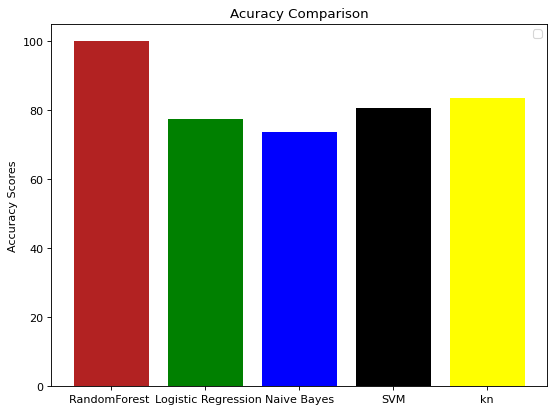

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
x1 = np.array(["RandomForest ", "  Logistic Regression","Naive Bayes","SVM","kn"])
y1 = np.array([randomTrainAccuracy*100,logisticTrainAccuracy*100, gNBtrainAccuracy*100, svmTrainAccuracy*100,knTrainAccuracy*100])
plt.ylabel('Accuracy Scores')
plt.title('Acuracy Comparison')
plt.bar(x1,y1,color=['firebrick', 'green','blue','black','yellow'])
plt.legend()
plt.show()

In [ ]:
!pip install matplotlib==3.4.2


     |████████████████████████████████| 10.3 MB 4.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


AttributeError: ignored

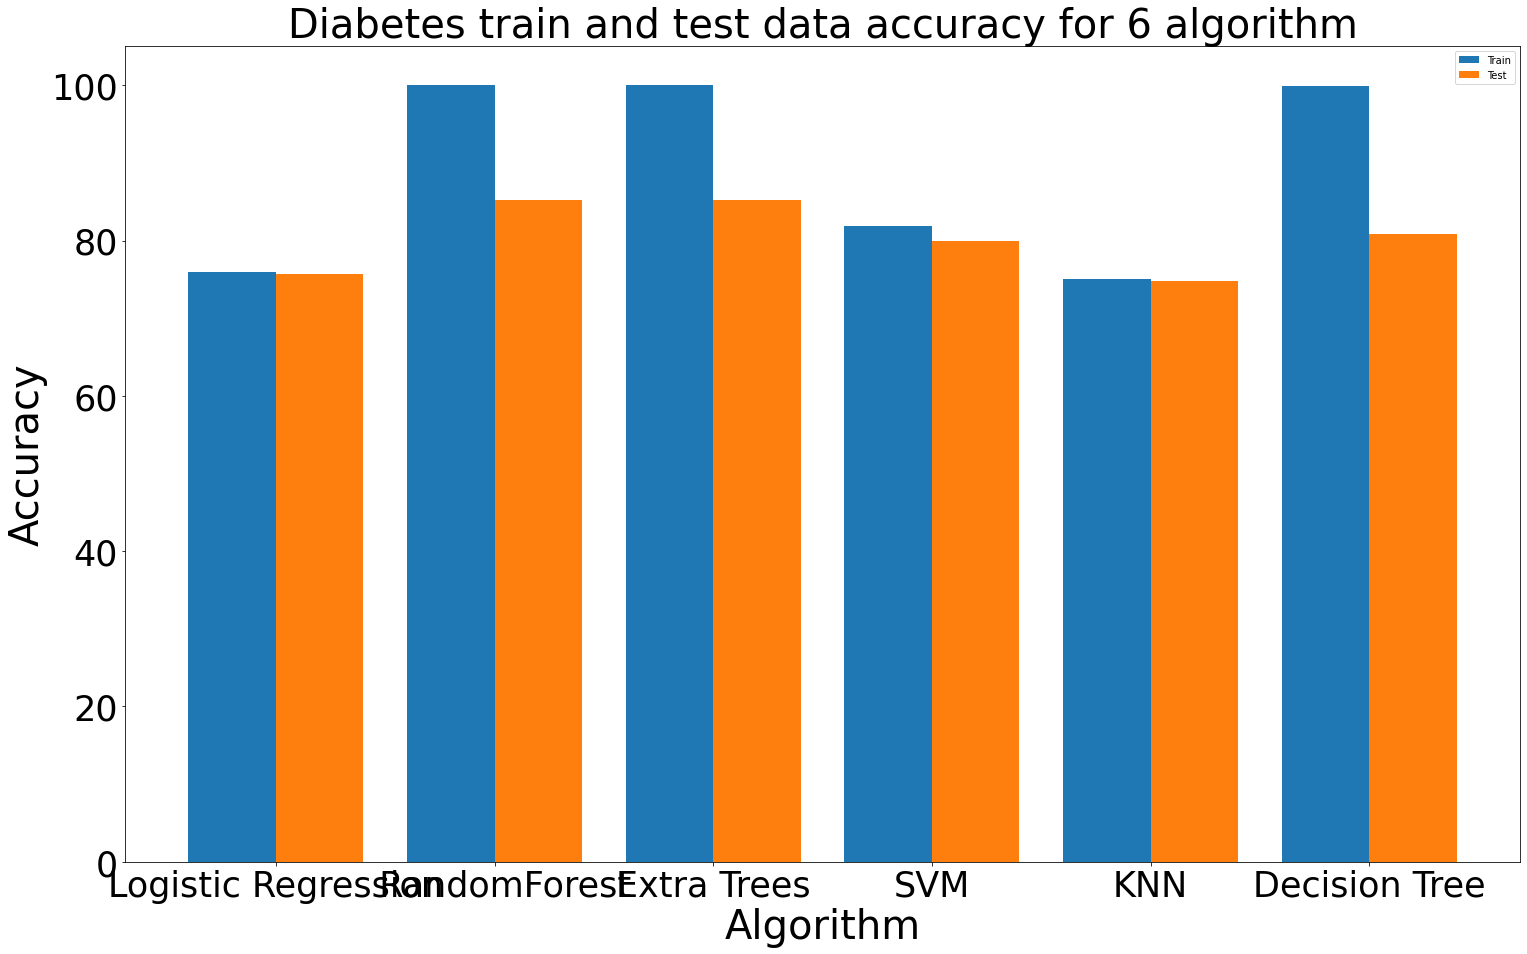

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ["Logistic Regression", "  RandomForest","Extra Trees","SVM","KNN","Decision Tree"]
train = [round(logisticTrainAccuracy*100,2), round(randomTrainAccuracy*100,2), round(etreeTrainAcc*100,2), round(svmTrainAccuracy*100,2), round(knTrainAccuracy*100,2),round(treeTrainAcc*100,2)]
test = [round(logisticTestAccuracy*100,2), round(randomTestAccuracy*100,2), round(etreeTestAcc*100,2), round(svmTestAccuracy*100,2), round(knTestAccuracy*100,2),round(treeTestAcc*100,2)]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25, 15))
rects1 = ax.bar(x - width/2, train, width, label='Train')
rects2 = ax.bar(x + width/2, test, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy',fontsize=40)
ax.set_xlabel('Algorithm',fontsize=40)
ax.set_title('Diabetes train and test data accuracy for 6 algorithm',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.tick_params(axis='both', labelsize=35)
ax.bar_label(rects1, padding=3,fontsize=40)
ax.bar_label(rects2, padding=3,fontsize=40)

fig.tight_layout()
plt.legend(fontsize=40)
plt.show()

# Performance analysis

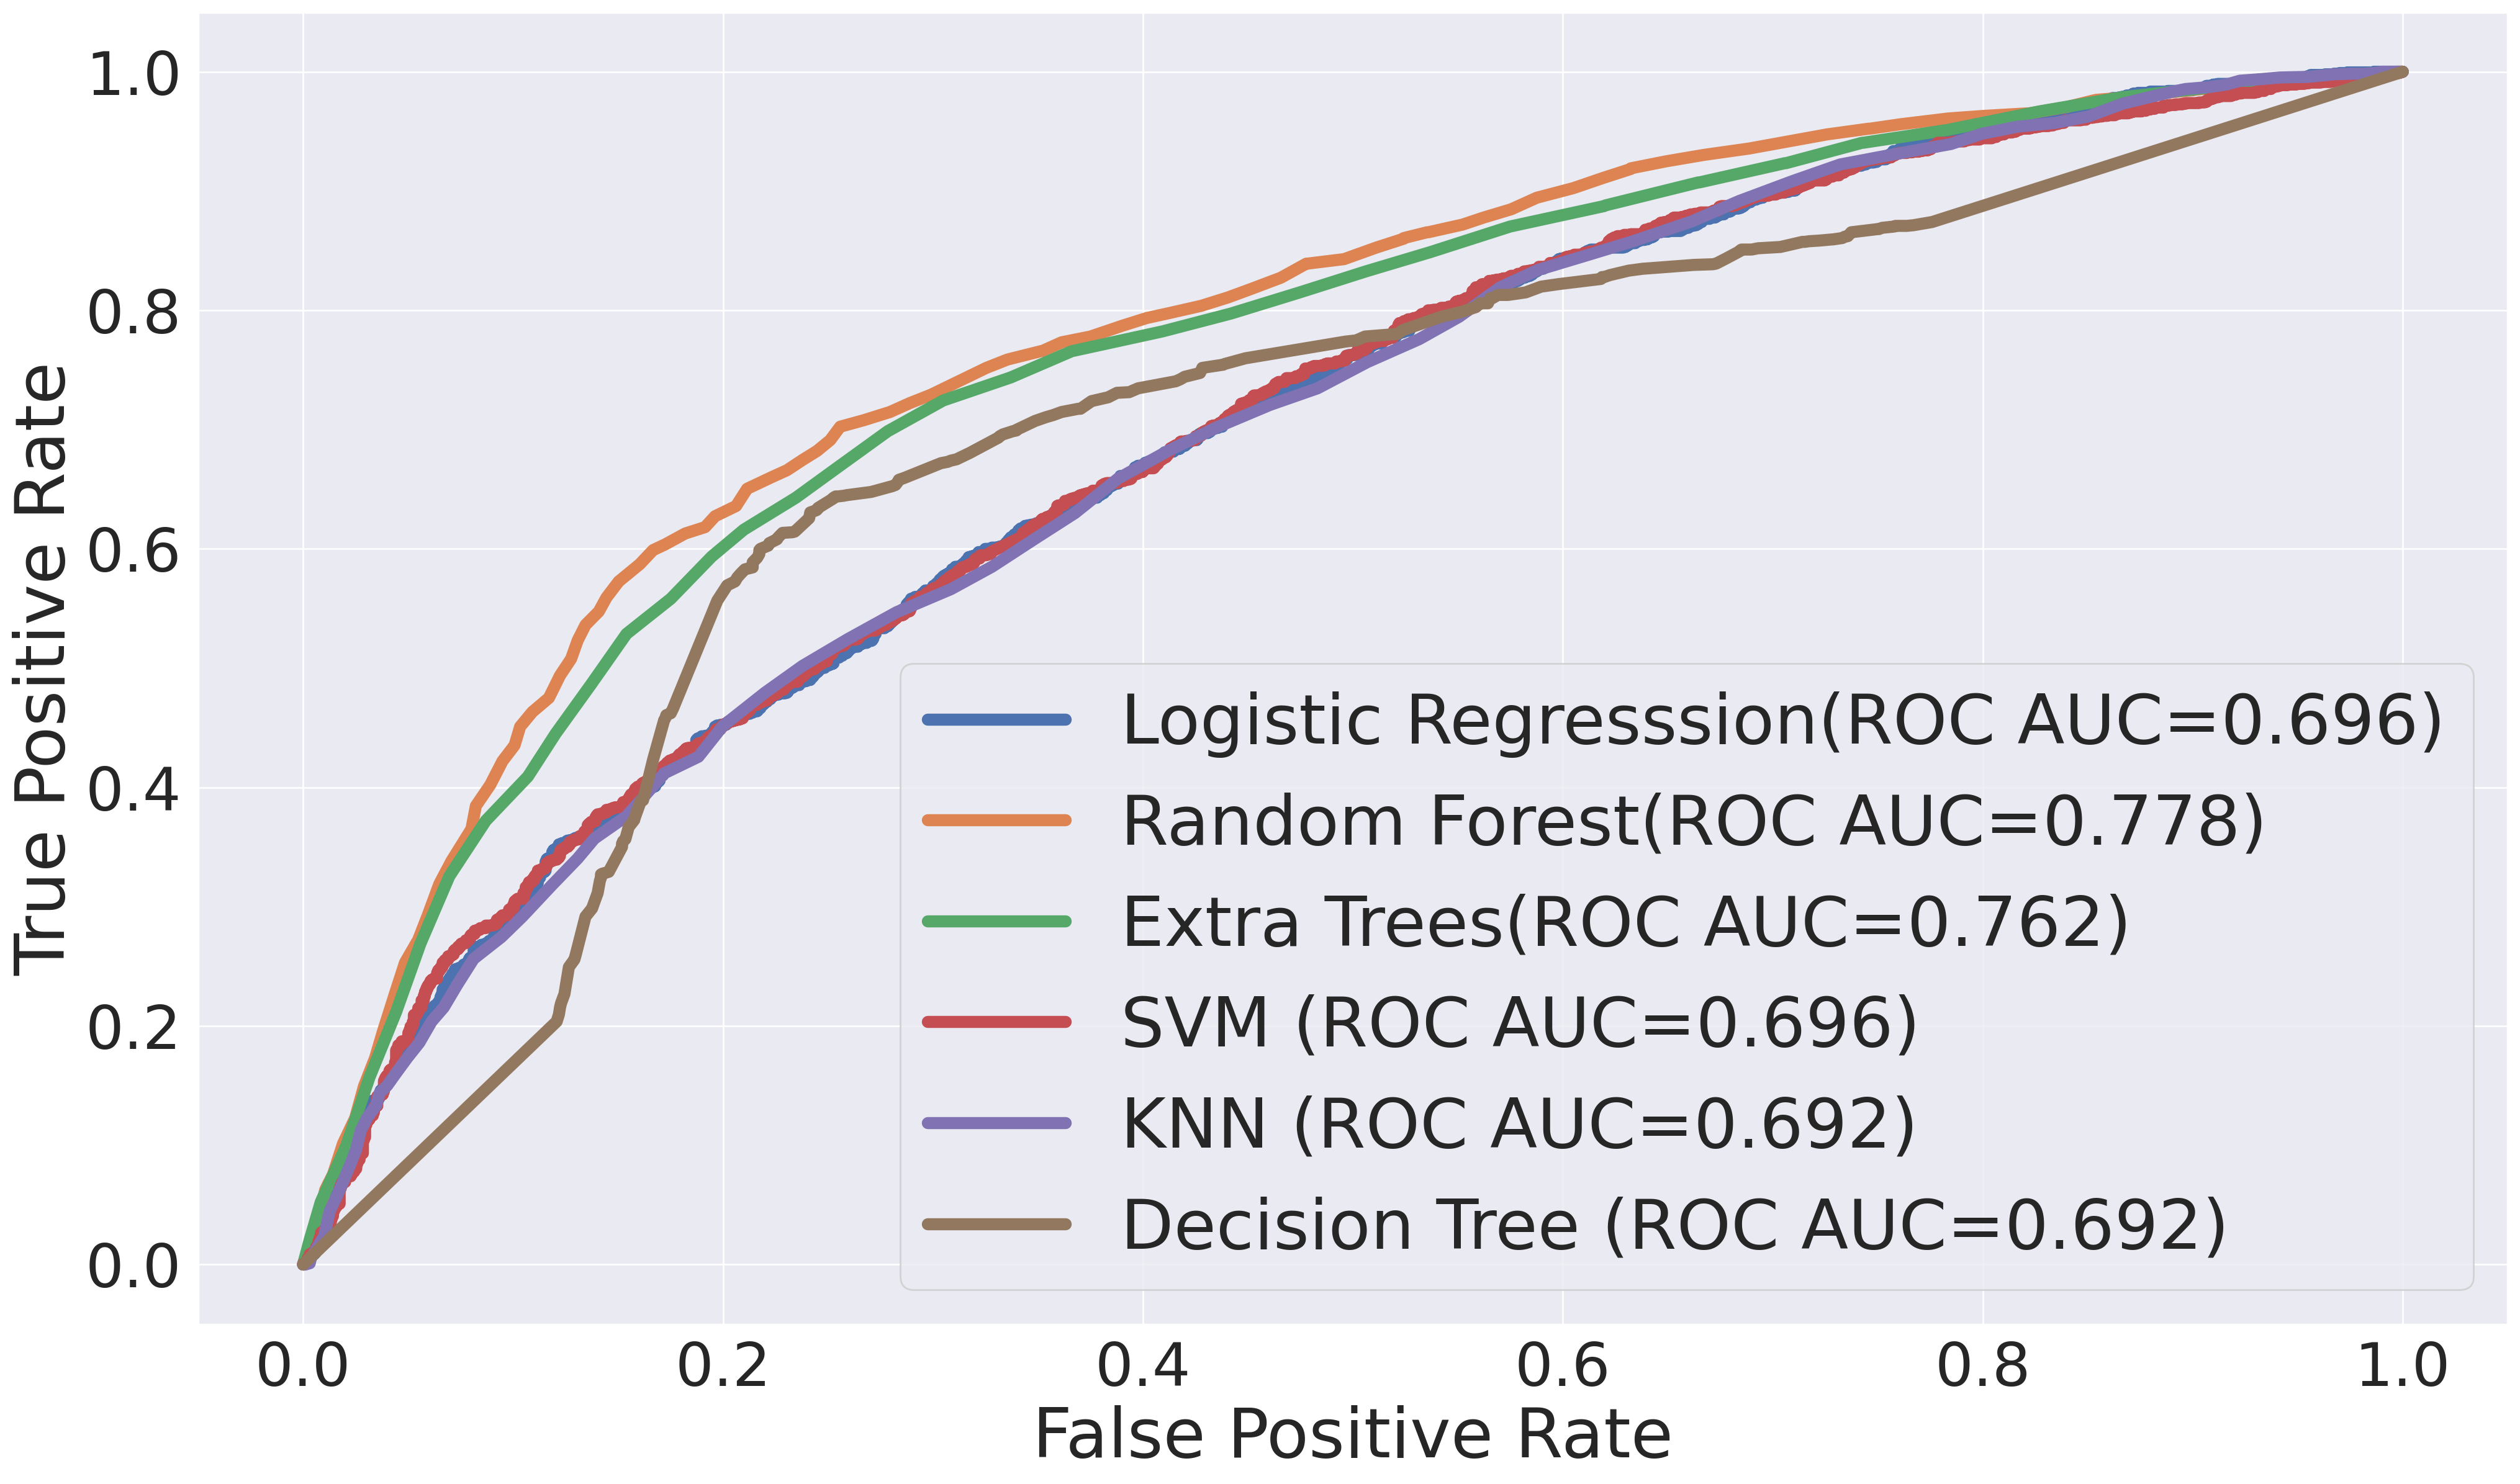

In [ ]:
from matplotlib import pyplot
from matplotlib.pyplot import figure

figure(figsize=(24, 14), dpi=200)
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regresssion(ROC AUC=%.3f)' % (lr_auc),linewidth=7.0)
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest(ROC AUC=%.3f)' % (rf_auc),linewidth=7.0)
pyplot.plot(ex_fpr, ex_tpr, marker='.', label='Extra Trees(ROC AUC=%.3f)' % (ex_auc),linewidth=7.0)
pyplot.plot(sb_fpr, sb_tpr, marker='.', label='SVM (ROC AUC=%.3f)' % (sb_auc),linewidth=7.0)
pyplot.plot(kn_fpr, kn_tpr, marker='.', label='KNN (ROC AUC=%.3f)' % (kn_auc),linewidth=7.0)
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (ROC AUC=%.3f)' % (dt_auc),linewidth=7.0)
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=40)
pyplot.ylabel('True Positive Rate',fontsize=40)
# show the legend
pyplot.tick_params(axis='both', labelsize=35)
pyplot.legend(fontsize=40)
# show the plot
pyplot.show()

# classification_report

In [ ]:
from sklearn.metrics import classification_report
print("Logistic Regration")
print(logisticTrainAccuracy)
print(logisticTestAccuracy)
print(classification_report(ytest,Logpred))
print("Random Forest")
print(randomTrainAccuracy)
print(randomTestAccuracy)
print(classification_report(ytest,Randompred))
print("Extraa Trees")
print(etreeTrainAcc)
print(etreeTestAcc)
print(classification_report(ytest,predictionclf7))
print("SVM")
print(svmTrainAccuracy)
print(svmTestAccuracy)
print(classification_report(ytest,SVMpred))
print("KNN")
print(knTrainAccuracy)
print(knTestAccuracy)
print(classification_report(ytest,KNNpred))
print("Dicicision Tree")
print(treeTrainAcc)
print(treeTestAcc)
print(classification_report(ytest,predictionclf6))

Logistic Regration
0.6477240732050681
0.6378622706726934
              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65      1896
         1.0       0.65      0.60      0.62      1865

    accuracy                           0.64      3761
   macro avg       0.64      0.64      0.64      3761
weighted avg       0.64      0.64      0.64      3761

Random Forest
0.9999061473486626
0.7205530444030843
              precision    recall  f1-score   support

         0.0       0.72      0.73      0.73      1896
         1.0       0.72      0.71      0.72      1865

    accuracy                           0.72      3761
   macro avg       0.72      0.72      0.72      3761
weighted avg       0.72      0.72      0.72      3761

Extraa Trees
0.9999530736743313
0.7101834618452539
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.72      1896
         1.0       0.71      0.70      0.71      1865

    accuracy          

# Save Model

In [ ]:

import joblib


In [ ]:
joblib.dump(random,"heart_detector_random")

['heart_detector_random']

In [ ]:
np.save("xtrain_heart.npy",xtrain)

# Prediction

In [ ]:
to_predict = np.array([4,114.0,65.0,39.000000,179.500000,21.9,0.432,37]).reshape(1,8)
result=model7.predict(to_predict)
if(int(result[0])==1):
        print('Sorry ! You are Suffering Diabetes')
else:
        print('Congrats ! you are Healthy') 

Congrats ! you are Healthy


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


# Lime

In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 12.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=56ec3ab9add4a049bf2a98ab594fd571c4ad58d9d62288f857f5fcf7ee4e43ab
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(xtrain),
    feature_names=xtrain.columns,
    mode='classification'
)

In [ ]:
xtest

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
19481,14630,2,181,90.0,120,80,1.0,1.0,0.0,0.0,1.0
13461,19715,2,163,59.0,110,60,1.0,2.0,1.0,0.0,1.0
18064,18224,1,160,55.0,120,80,1.0,1.0,0.0,0.0,1.0
9080,20315,1,170,74.0,120,80,1.0,1.0,0.0,0.0,0.0
8163,20043,1,165,65.0,130,80,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
24963,20259,1,160,94.0,130,90,3.0,3.0,0.0,1.0,1.0
4602,21878,2,158,64.0,120,80,1.0,1.0,0.0,0.0,1.0
21092,20347,1,165,87.0,120,70,1.0,1.0,0.0,0.0,0.0
14424,17394,1,156,59.0,110,80,1.0,1.0,0.0,0.0,1.0


In [ ]:
exp = interpretor.explain_instance(
    data_row=xtest.iloc[305], ##new data
    predict_fn=random.predict_proba
)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
!pip install shapash

     |████████████████████████████████| 899 kB 13.8 MB/s 
     |████████████████████████████████| 1.0 MB 60.8 MB/s 
     |████████████████████████████████| 642 kB 65.7 MB/s 
     |████████████████████████████████| 9.6 MB 63.8 MB/s 
     |████████████████████████████████| 3.3 MB 65.7 MB/s 
     |████████████████████████████████| 564 kB 64.6 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 210 kB 69.1 MB/s 
     |████████████████████████████████| 34.5 MB 11 kB/s 
     |████████████████████████████████| 357 kB 52.0 MB/s 
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013944 sha256=8a385d1959636b286d3df52900cf025b4d571191f9b1083019e20f61da961bc0
  Stored in directory: /root/.cache/pip/wheels/71/17/b0/8bebc086e55a01cf4036902b6ca05fce3fb4c7fd48dbd07717
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669714 sha256=ba557d377d5fc8cc168fb071335fa25e51fd88e2318f6e855fc6bf9cce

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer

In [ ]:
xpl = SmartExplainer(model=random)

In [ ]:
xpl.compile(
    x=xtest,
   
)

In [ ]:
xpl.plot.features_importance(label=1)

In [ ]:
xpl.plot.compare_plot(row_num=[305, 200], label=1)